### Análisis DF Seguro Médico

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#Es un dataset de seguro de salud
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
#Se ha comprobado que no hay valores raros (como "?") en todos los atributos

sorted(df["sex"].unique())

['female', 'male']

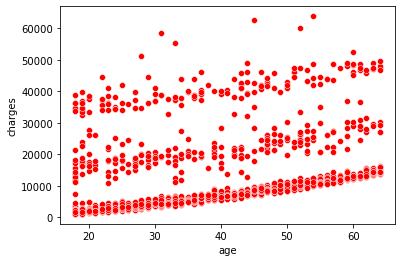

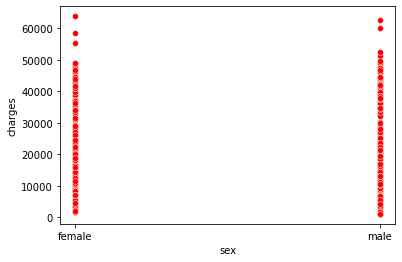

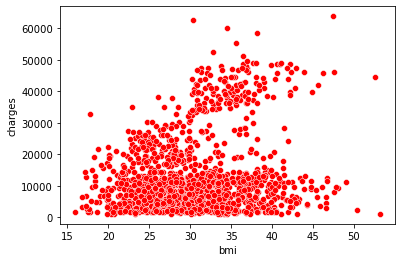

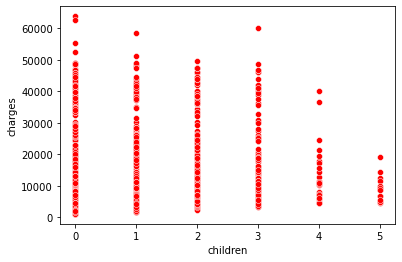

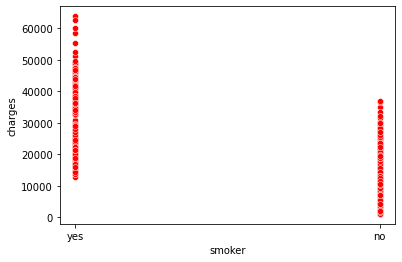

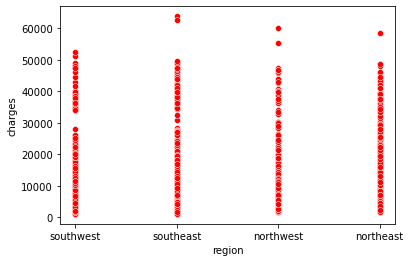

In [21]:
for i in ["age", "sex", "bmi", "children", "smoker", "region"]:
    sns.scatterplot(x = df[i], y = df["charges"], color = "r")
    plt.show()

In [50]:
#Se crean los dummies de sexo y fumador
#male = 0; female = 1
#smoker = 1; no smoker = 0

for i in range(df.shape[0]):
    if df.loc[i,"sex"] == "female":
        df.loc[i,"dummy_sex"] = int(1)
    else:
        df.loc[i,"dummy_sex"] = int(0)
        
for i in range(df.shape[0]):
    if df.loc[i,"smoker"] == "yes":
        df.loc[i,"dummy_smoker"] = int(1)
    else:
        df.loc[i,"dummy_smoker"] = int(0)
        
df

,age,sex,bmi,children,smoker,region,charges,dummy_sex,dummy_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0


In [51]:
#Se crea el dummy de región

dummy_region = pd.get_dummies(df["region"])
dummy_region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [52]:
#Se junta el dummy de región al dataframe

df = pd.concat([df, dummy_region], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,dummy_sex,dummy_smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,1.0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,0.0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,0.0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0,0,0,1


In [53]:
del df["southwest"]
df

,age,sex,bmi,children,smoker,region,charges,dummy_sex,dummy_smoker,northeast,northwest,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,1.0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,0.0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,0.0,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0,0,0


In [70]:
df_analisis = df[["age", "bmi", "children", "charges", "dummy_sex", "dummy_smoker", "northeast", "northwest", "southeast"]]
df_analisis

,age,bmi,children,charges,dummy_sex,dummy_smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,1.0,1.0,0,0,0
1,18,33.770,1,1725.55230,0.0,0.0,0,0,1
2,28,33.000,3,4449.46200,0.0,0.0,0,0,1
3,33,22.705,0,21984.47061,0.0,0.0,0,1,0
4,32,28.880,0,3866.85520,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,0.0,0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,1,0,0
1335,18,36.850,0,1629.83350,1.0,0.0,0,0,1
1336,21,25.800,0,2007.94500,1.0,0.0,0,0,0


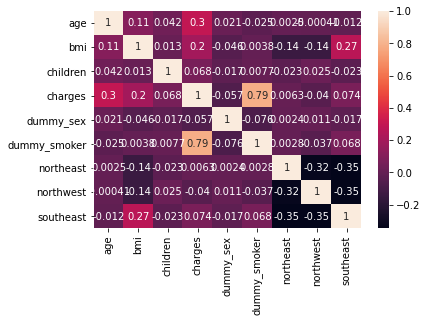

In [72]:
#Mapa de correlaciones

correlation_mat = df_analisis.corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()

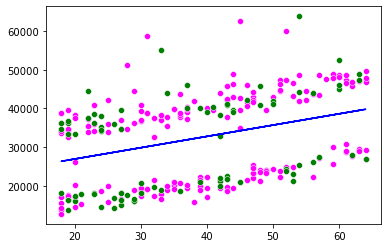

In [98]:
#Análisis precio frente a edad (fumadores)

x = df_analisis[df_analisis["dummy_smoker"] == 1.0]["age"].values.reshape(274,1)
y = df_analisis[df_analisis["dummy_smoker"] == 1.0]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()

In [107]:
#Análisis para ver qué atributo diferencia los dos grupos de la gráfica de arriba (se observa que es el bmi)
#Se observa que el valor límite del bmi entre las dos gráficas es 30

df_prueba = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["charges"] < 30000)]
df_prueba.describe()

,age,bmi,children,charges,dummy_sex,dummy_smoker,northeast,northwest,southeast
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.000000,122.000000,122.000000
mean,37.491803,25.283443,1.098361,20533.262567,0.500000,1.0,0.286885,0.270492,0.254098
std,13.479857,3.104577,1.195099,3898.722807,0.502062,0.0,0.454173,0.446046,0.437148
min,18.000000,17.195000,0.000000,12829.455100,0.000000,1.0,0.000000,0.000000,0.000000
25%,27.000000,23.250000,0.000000,17512.324437,0.000000,1.0,0.000000,0.000000,0.000000
50%,37.000000,25.650000,1.000000,19949.102150,0.500000,1.0,0.000000,0.000000,0.000000
75%,47.750000,27.883750,2.000000,23291.107800,1.000000,1.0,1.000000,1.000000,0.750000
max,64.000000,30.000000,5.000000,29523.165600,1.000000,1.0,1.000000,1.000000,1.000000


In [106]:
#Análisis para ver qué atributo diferencia los dos grupos de la gráfica de arriba (se observa que es el bmi)
#Se observa que el valor límite del bmi entre las dos gráficas es 30

df_prueba = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["charges"] > 30000)]
df_prueba.describe()

,age,bmi,children,charges,dummy_sex,dummy_smoker,northeast,northwest,southeast
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.0,152.000000,152.000000,152.000000
mean,39.335526,35.062730,1.125000,41294.115057,0.355263,1.0,0.210526,0.164474,0.394737
std,14.260093,4.647097,1.129452,5955.650094,0.480175,0.0,0.409030,0.371930,0.490410
min,18.000000,17.765000,0.000000,30184.936700,0.000000,1.0,0.000000,0.000000,0.000000
25%,26.750000,31.775000,0.000000,36937.375795,0.000000,1.0,0.000000,0.000000,0.000000
50%,39.500000,34.750000,1.000000,40227.945750,0.000000,1.0,0.000000,0.000000,0.000000
75%,51.000000,37.055000,2.000000,44733.136925,1.000000,1.0,0.000000,0.000000,1.000000
max,64.000000,52.580000,4.000000,63770.428010,1.000000,1.0,1.000000,1.000000,1.000000


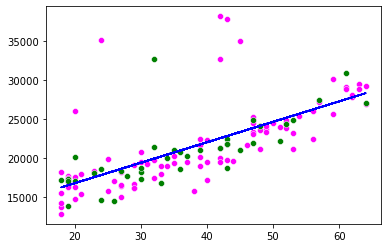

0.551494123014719


In [145]:
#Análisis precio frente a edad (fumadores y bmi < 30)

x = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] < 30)]["age"].values.reshape(129,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] < 30)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

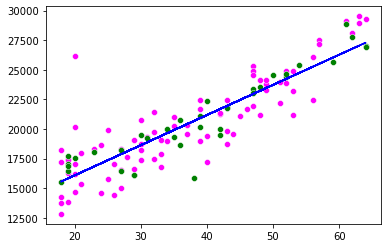

0.8667168965681069


In [144]:
#Análisis precio frente a edad (fumadores, bmi < 30 y precio < 30000)

x = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] < 30) & (df_analisis["charges"] < 30000)]["age"].values.reshape(121,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] < 30) & (df_analisis["charges"] < 30000)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

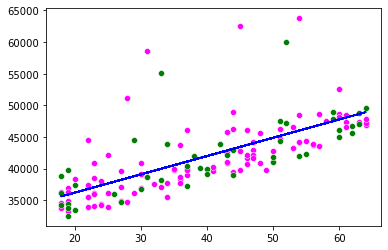

0.5148039267714704


In [140]:
#Análisis precio frente a edad (fumadores y bmi > 30)

x = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] > 30)]["age"].values.reshape(144,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] > 30)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

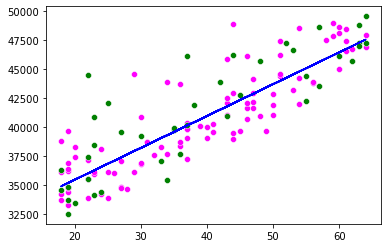

0.716060378005239


In [147]:
#Análisis precio frente a edad (fumadores, bmi > 30 y precio < 50000)

x = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] > 30) & (df_analisis["charges"] < 50000)]["age"].values.reshape(137,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 1.0) & (df_analisis["bmi"] > 30) & (df_analisis["charges"] < 50000)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

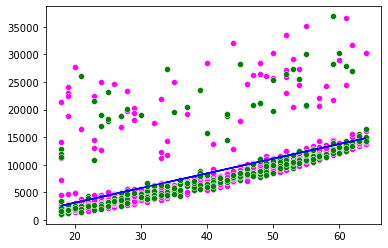

0.35551975539803526


In [150]:
#Análisis precio frente a edad (no fumadores)


x = df_analisis[df_analisis["dummy_smoker"] == 0.0]["age"].values.reshape(1064,1)
y = df_analisis[df_analisis["dummy_smoker"] == 0.0]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

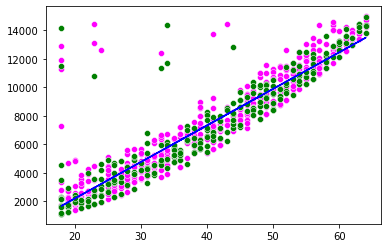

0.8433717427794789


In [152]:
#Análisis precio frente a edad (no fumadores y precio < 15000)


x = df_analisis[(df_analisis["dummy_smoker"] == 0.0) & (df_analisis["charges"] < 15000)]["age"].values.reshape(973,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 0.0) & (df_analisis["charges"] < 15000)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x_train, y_train)

#datos de entrenamiento (magenta)
sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green")  
#regresión
plt.plot(x_train, regresion_lineal.coef_[0]*x_train + regresion_lineal.intercept_, '-b') #El "-b" es el color de la recta
plt.show()
print(regresion_lineal.score(x_test, y_test))

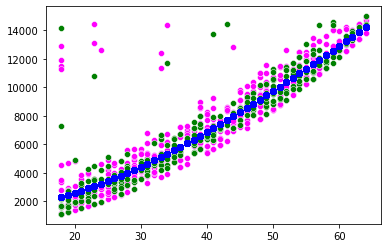

0.8701999749441247


In [165]:
#Análisis polinomial precio frente a edad (no fumadores y precio < 15000)

x = df_analisis[(df_analisis["dummy_smoker"] == 0.0) & (df_analisis["charges"] < 15000)]["age"].values.reshape(973,1)
y = df_analisis[(df_analisis["dummy_smoker"] == 0.0) & (df_analisis["charges"] < 15000)]["charges"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)

regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(x_train_poly, y_train)

sns.scatterplot(x = x_train.flatten(), y = y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(x = x_test.flatten(), y = y_test.flatten(), color="green") #prueba 
plt.plot(x_train, regresion_poly.coef_[0]*1 + regresion_poly.coef_[1]*x_train + regresion_poly.coef_[2]*x_train**2 + regresion_poly.coef_[3]*x_train**3 + regresion_poly.intercept_, 'ob')
plt.show()
print(regresion_lineal.score(x_test, y_test))

In [177]:
#Análisis multilineal rápido y poco detallado

X = np.asanyarray(df_analisis[['age', 'bmi', 'children', 'dummy_sex', 'dummy_smoker','northeast', 'northwest', 'southeast']])
y = np.asanyarray(df_analisis[['charges']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

r2_sin_ajustar = regresion_lineal.score(X_test, y_test) 
r2_ajustada = 1 - (1-regresion_lineal.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

r2_sin_ajustar, r2_ajustada

(0.7763511621203376, 0.7717985140210061)

<AxesSubplot:>

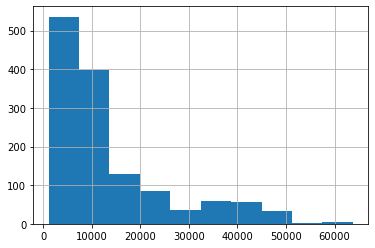

In [126]:
#Simplemente para ver cómo varía charges vs log(charges)

df["charges"].hist()

<AxesSubplot:>

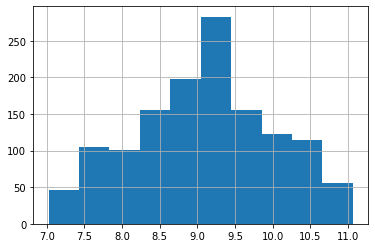

In [166]:
#Simplemente para ver cómo varía charges vs log(charges)

df["log_charges"] = df["charges"].apply(lambda x:np.log(x))
df["log_charges"].hist()